In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/mnist/"
train_data = np.loadtxt( "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt("mnist_test.csv", 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [ ]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [ ]:
import numpy as np

lr = np.arange(10)

for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)



label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [ ]:
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99



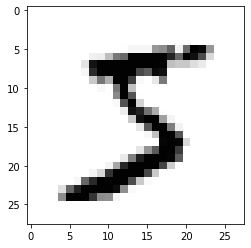

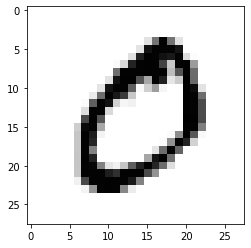

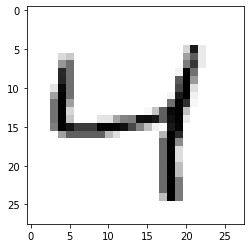

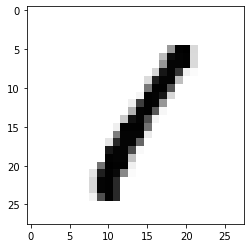

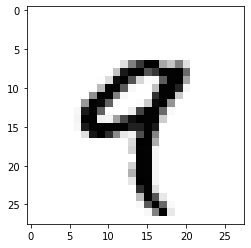

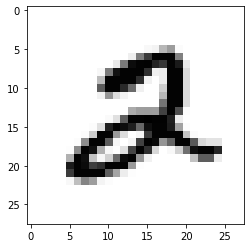

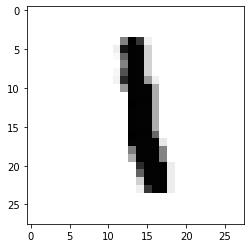

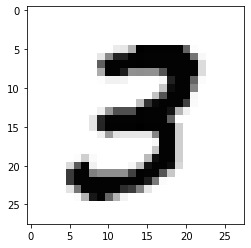

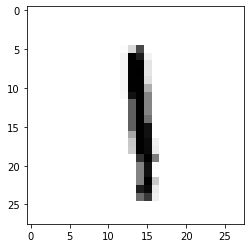

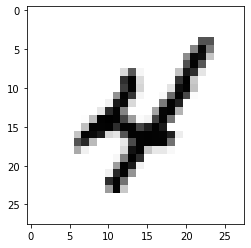

In [ ]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()



In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean,  scale=sd)

In [ ]:
import numpy as np

@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)


class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network

        rad = 1 / np.sqrt(self.no_of_in_nodes)
        print("no_of_in_nodes",self.no_of_in_nodes)
        print("rad",rad)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                         self.no_of_hidden_nodes))
       """
        self.wih = np.random.normal(0.0, pow(self.no_of_in_nodes, -0.5), (self.no_of_hidden_nodes, self.no_of_in_nodes))
        self.who = np.random.normal(0.0, pow(self.no_of_hidden_nodes, -0.5), (self.no_of_out_nodes, self.no_of_hidden_nodes))
        print("self.wih.shape :",self.wih.shape)
        print("self.wih :",self.wih)

        print("self.who.shape :", self.who.shape)

In [ ]:
ANN = NeuralNetwork(no_of_in_nodes = 20,  no_of_out_nodes = 5,  no_of_hidden_nodes = 10,learning_rate = 0.1)
ANN.create_weight_matrices()

self.wih.shape : (10, 20)
self.wih : [[-0.11299559 -0.02552161  0.05616001  0.36012999 -0.39483196  0.17545208
   0.18660858 -0.21795941  0.10810888 -0.03723456  0.02533102  0.23519227
   0.10258407 -0.28216368 -0.15013943 -0.20810034  0.11458098  0.05060744
  -0.48616756 -0.11041452]
 [ 0.11847327  0.09959788 -0.05170418 -0.21501329  0.03264013 -0.0369191
   0.2216491  -0.19872518  0.19079598  0.10124285  0.24358569 -0.01330876
  -0.37489841  0.20449182  0.13423462  0.02984346 -0.01732483  0.16586362
  -0.29641878 -0.09306722]
 [ 0.39236465 -0.04450359 -0.14506007 -0.31998312  0.02995707  0.26317822
  -0.06717944  0.01431972  0.00690593 -0.17534056  0.54022489  0.06820845
  -0.13879867 -0.40337395 -0.19539409 -0.04968893  0.21578521  0.03141461
   0.2180237   0.20624856]
 [-0.18352988 -0.01057425  0.08602554  0.08111928  0.14738427  0.17584122
  -0.15458787  0.25219914 -0.00699959 -0.35721306  0.23149036  0.11147906
   0.38560647  0.2747363  -0.4490782   0.05219917 -0.50589211 -0.0497

In [ ]:
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network
        """

        self.wih = np.random.normal(0.0, pow(self.no_of_in_nodes, -0.5), (self.no_of_hidden_nodes, self.no_of_in_nodes))
        self.who = np.random.normal(0.0, pow(self.no_of_hidden_nodes, -0.5), (self.no_of_out_nodes, self.no_of_hidden_nodes))
       
        
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can 
        be tuple, list or ndarray
        """
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        # print("input_vector shape",input_vector.shape)
         # print("input_vector ",input_vector)

         #print("target_vector shape",target_vector.shape)
        # print("target_vector",target_vector)

        
        output_vector1 = np.dot(self.wih, input_vector)

        # print("output_vector1",target_vector)
         #print("output_vector1 shape",output_vector1.shape)

        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, output_hidden)

       # print("output_vector2",output_vector2)
       # print("output_vector2 shape",output_vector2.shape)

        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network

        # print("output_errors",output_errors)
        # print("output_errors shape",output_errors.shape)

        # update the weights:
        tmp = output_errors * output_network  * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp,  output_hidden.T)
        self.who += tmp


        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T,  output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate  * np.dot(tmp, input_vector.T)


    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector

In [ ]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)

for i in range(100): # train the first 100 image 
    ANN.train(train_imgs[i], train_labels_one_hot[i])

epochs = 1000
for epoch in range(epochs):  
    print("epoch: ", epoch)
    for i in range(1000):
        ANN.train(train_imgs[i], 
                 train_labels_one_hot[i])

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

In [ ]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))
    



[7.] 7 0.9920215207985525
[2.] 2 0.6861302390044546
[1.] 1 0.9949386556785738
[0.] 0 0.9675386985246389
[4.] 4 0.9728156101509139
[1.] 1 0.9948185598830495
[4.] 4 0.9905266909693391
[9.] 9 0.9951142337813114
[5.] 6 0.2842042029553952
[9.] 9 0.7168101418507327
[0.] 0 0.9419975731894362
[6.] 6 0.26229473331867253
[9.] 9 0.9930386030121953
[0.] 0 0.9888089355172446
[1.] 1 0.9929436954062467
[5.] 5 0.7990075105437489
[9.] 9 0.9731688199517995
[7.] 7 0.9896314668306039
[3.] 3 0.3717665302187759
[4.] 4 0.9835198811575953
